In [1]:
FILE=2                # There are 48 files.
CHANNEL=0             # There are 2 channels
SAMPLE_START=114000   # Start of the sample in the file.
SAMPLE_SIZE=4000      # Number of readings (360 per second).

In [2]:
import sys
sys.path.append("/home/carlitos/Documents/Projects/ecg_classification")

In [7]:
import wfdb as wf
import numpy as np
from src.datasets import mitdb as dm
from matplotlib import pyplot as plt

## Load File

In [6]:
# Get available data files.
dbfiles = dm.get_records("../data/raw/mitdb")
print('Total files: ', len(dbfiles))

# Pick a file.
datfile = dbfiles[FILE]
print('Loading file:', datfile)

# Read the file.
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Info about the data.
print('Sampling frequency:', record[1].get('fs'))
print('Data shape:', record[0].shape)
print('Annotations:', len(annotation.num))

5it [00:00, 6565.91it/s]
1905it [00:02, 786.00it/s]
1it [00:00, 2231.01it/s]
4it [00:00, 6331.02it/s]
1905it [00:02, 761.17it/s]
1it [00:00, 1736.05it/s]
5it [00:00, 4508.07it/s]
1905it [00:03, 629.71it/s]
1it [00:00, 2076.39it/s]
5it [00:00, 5060.69it/s]
1905it [00:02, 749.53it/s]
1it [00:00, 1881.70it/s]
5it [00:00, 4890.75it/s]
1905it [00:02, 752.81it/s]
1it [00:00, 326.08it/s]
6it [00:00, 2227.85it/s]
1905it [00:02, 746.95it/s]
1it [00:00, 1790.91it/s]
6it [00:00, 3814.16it/s]
1905it [00:02, 792.51it/s]
1it [00:00, 1523.54it/s]
5it [00:00, 4808.88it/s]
1905it [00:02, 795.27it/s]
1it [00:00, 1323.54it/s]
4it [00:00, 4231.33it/s]
1905it [00:02, 771.00it/s]
1it [00:00, 1741.10it/s]
5it [00:00, 4705.30it/s]
1905it [00:02, 763.73it/s]
1it [00:00, 1776.49it/s]
5it [00:00, 4788.02it/s]
1905it [00:02, 757.70it/s]
1it [00:00, 1386.55it/s]
5it [00:00, 3541.29it/s]
1905it [00:02, 794.27it/s]
1it [00:00, 2520.62it/s]
4it [00:00, 5482.75it/s]
1905it [00:02, 715.67it/s]
1it [00:00, 1160.25it/s]


Downloaded 48 data files
Download finished
Total files:  48
Loading file: ../data/raw/mitdb/102
Sampling frequency: 360
Data shape: (650000, 2)
Annotations: 2192


## Plot

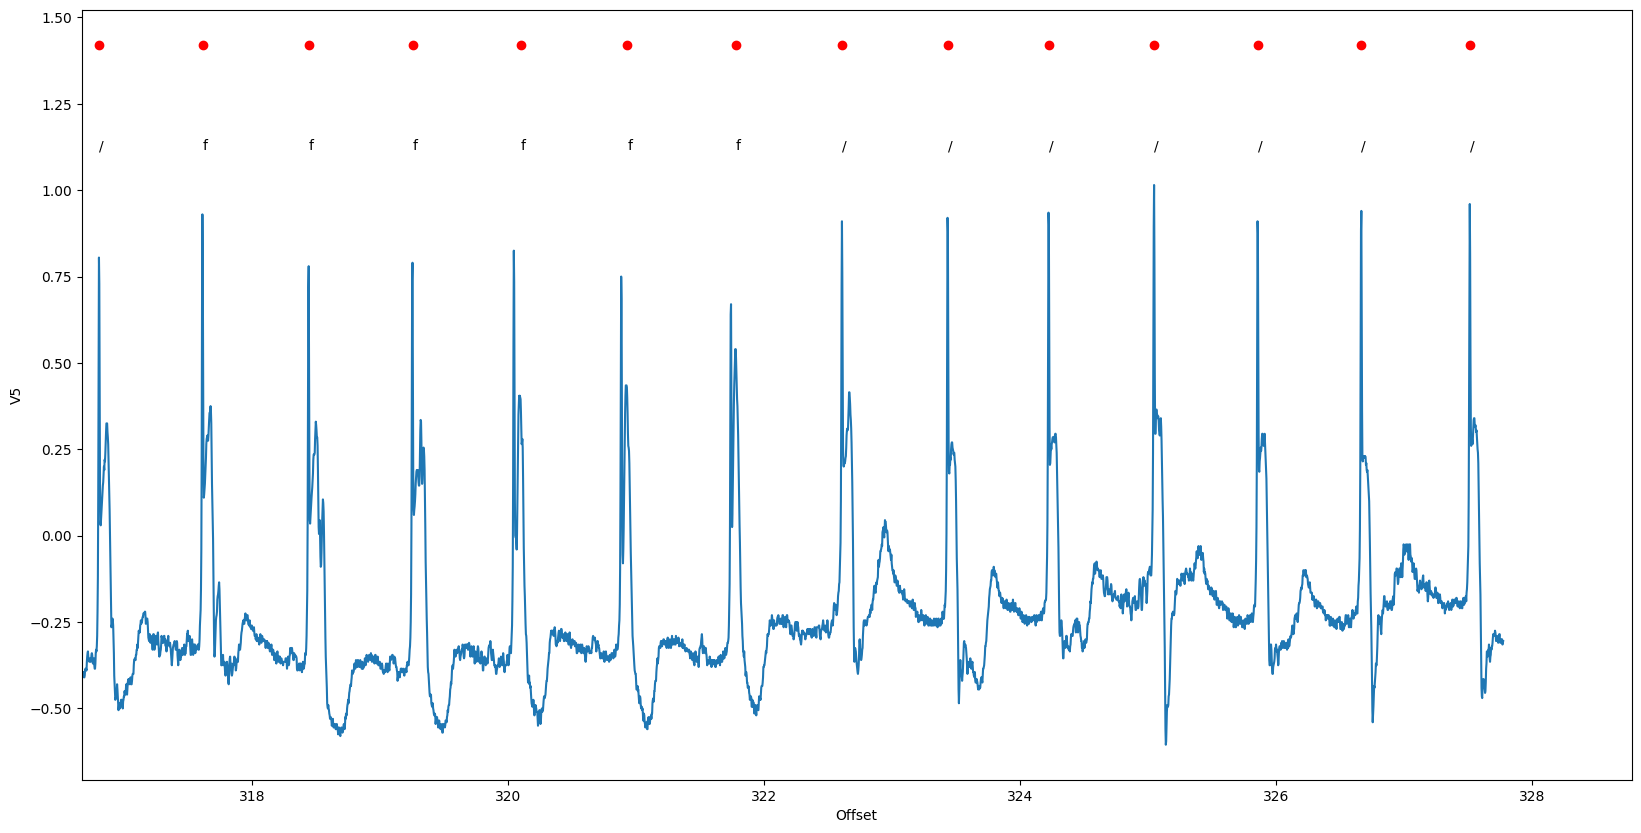

In [8]:
record = wf.rdsamp(datfile)
annotation = wf.rdann(datfile, 'atr')

# Get data and annotations for the samples selected below.
sample_end = SAMPLE_START + SAMPLE_SIZE
channel = record[0][SAMPLE_START:sample_end, CHANNEL]

# Plot the heart beats. Time scale is number of readings
# divided by sampling frequency.
times = (np.arange(SAMPLE_SIZE, dtype = 'float') + SAMPLE_START) / record[1].get('fs')
plt.figure(figsize=(20,10))
plt.plot(times, channel)

# Extract annotations.
where = np.logical_and(annotation.sample >= SAMPLE_START, annotation.sample < sample_end)
annots = annotation.sample[where] - SAMPLE_START
annotypes = np.array(annotation.symbol)
annotypes = annotypes[where]

# Plot the Annotations.
annotimes = times[annots]
plt.plot(annotimes, np.ones_like(annotimes) * channel.max() * 1.4, 'ro')

# Annotation codes.
for idx, annot in enumerate(annots):
    plt.annotate(annotypes[idx], xy = (times[annot], channel.max() * 1.1))

plt.xlim([SAMPLE_START / record[1].get('fs'), (sample_end / record[1].get('fs')) + 1])
plt.xlabel('Offset')
plt.ylabel(record[1].get('sig_name')[CHANNEL])
plt.show()